# Regresion lineal 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [76]:
df = pd.read_csv('/home/marcos/Optimizacion/generated_data.csv')
df.head()

,x,y
0,0,38.495595
1,1,42.800186
2,2,34.435632
3,3,49.959406
4,4,31.290784


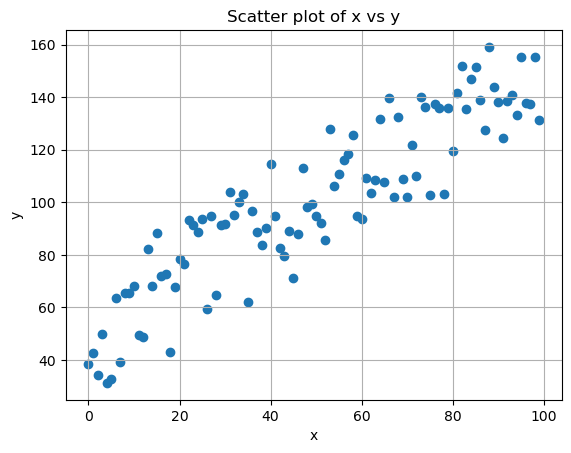

In [77]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.grid()
plt.show()

Mean Squared Error: 187.6685772427936


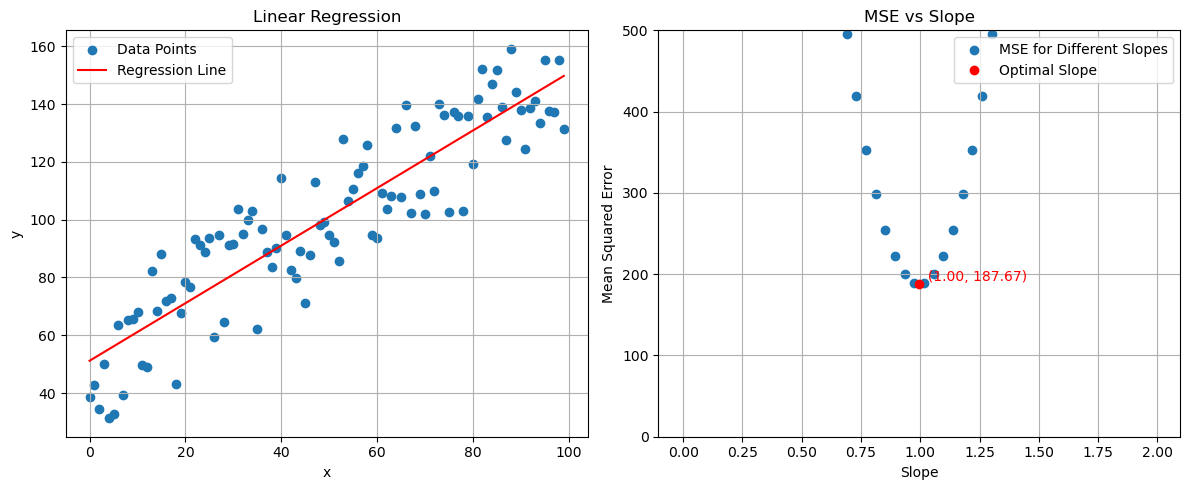

In [78]:
#linear regression
X = df['x'].values.reshape(-1, 1)
y = df['y'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


#MSE
MSE = np.mean((y - y_pred)**2)
print(f'Mean Squared Error: {MSE}')

#MSE progrssion
slopes = np.linspace(model.coef_[0] - 1, model.coef_[0] + 1, 50)
mse = []
for slope in slopes:
    y_pred_temp = slope * X.flatten() + model.intercept_
    mse.append(np.mean((y - y_pred_temp)**2))



fig , axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(df['x'], df['y'], label='Data Points')
axs[0].plot(df['x'], y_pred, color='red', label='Regression Line')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Linear Regression')
axs[0].grid()
axs[0].legend()

axs[1].scatter(slopes, mse, label='MSE for Different Slopes')
axs[1].set_xlabel('Slope')
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_title('MSE vs Slope')
axs[1].plot(model.coef_[0], MSE, 'ro', label='Optimal Slope')
axs[1].text(model.coef_[0], MSE, f'  ({model.coef_[0]:.2f}, {MSE:.2f})', color='red', va='bottom')
axs[1].set_ylim(0, 500)
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()




In [81]:
pendiente = model.coef_[0]
interseccion = model.intercept_

print(f"Ecuación: y = {pendiente:.2f}x + {interseccion:.2f}")


Ecuación: y = 1.00x + 51.19


# Regresion Logistica

In [51]:

df2 = pd.read_csv('/home/marcos/Optimizacion/logistic_regression.csv')
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
df_log= df2[['radius_mean','diagnosis']]
df_log.head()

,radius_mean,diagnosis
0,17.99,M
1,20.57,M
2,19.69,M
3,11.42,M
4,20.29,M


In [62]:
x = df_log['radius_mean'].values.reshape(-1, 1)
y = df_log['diagnosis'].values


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [63]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

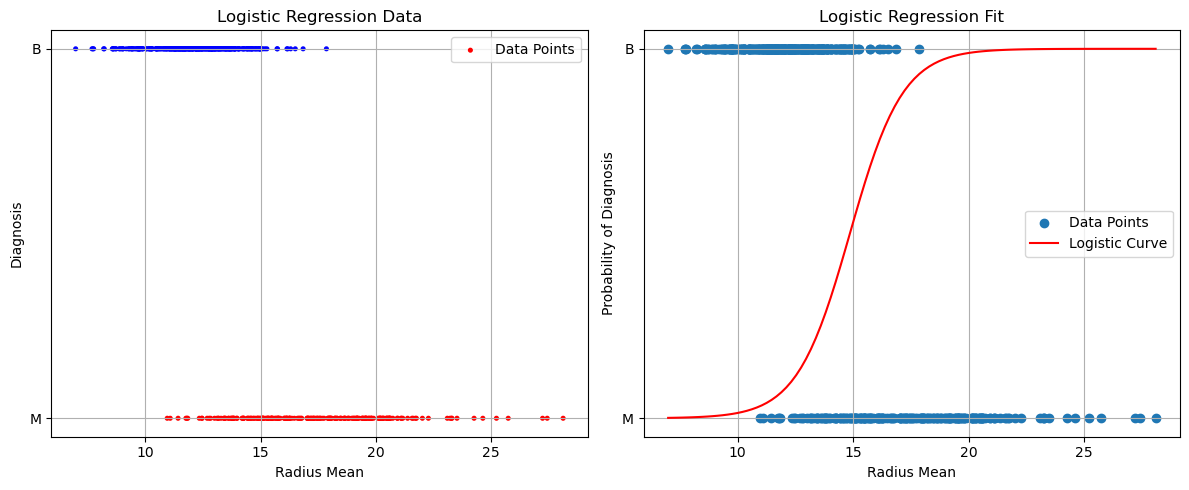

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(x, y, s=7, c=['red' if label == 'M' else 'blue' for label in y], label='Data Points')
axs[0].set_xlabel('Radius Mean')
axs[0].set_ylabel('Diagnosis')
axs[0].set_title('Logistic Regression Data')
axs[0].grid()
axs[0].legend()

axs[1].scatter(x, y, label='Data Points')
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_line_scaled = scaler.transform(x_line)
y_line_prob = model.predict_proba(x_line_scaled)[:, 1]
axs[1].plot(x_line, y_line_prob, color='red', label='Logistic Curve')
axs[1].set_xlabel('Radius Mean')
axs[1].set_ylabel('Probability of Diagnosis')
axs[1].set_title('Logistic Regression Fit')
axs[1].grid()
axs[1].legend()
plt.tight_layout()
plt.show()

In [66]:
accuracy_score(ytest, ypred)


0.9210526315789473

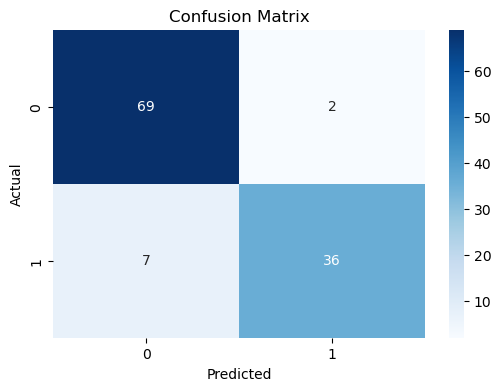

In [73]:

confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()